In [49]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

https://facebook.github.io/prophet/docs/trend_changepoints.html

https://facebook.github.io/prophet/docs/saturating_forecasts.html


In [50]:
# Read the data into a pandas data frame.
df = pd.read_csv("volte_interconnect.csv",sep=";")
df["DT"] = pd.to_datetime(df.DT,format="%d.%m.%Y")

In [51]:
df.head()

,DT,Interconnect Count
0,2021-10-01,121407
1,2021-10-02,54945
2,2021-10-03,31077
3,2021-10-04,120577
4,2021-10-05,97341


<AxesSubplot:xlabel='DT'>

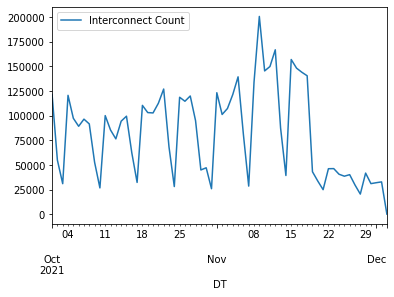

In [52]:
df.set_index("DT").plot()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DT                  64 non-null     datetime64[ns]
 1   Interconnect Count  64 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [54]:
# Replace the column name of date with "ds" and actual values with "y".
df.columns = ["ds","y"]

# define the model
model = Prophet(changepoint_prior_scale=0.5)

# fit the model
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


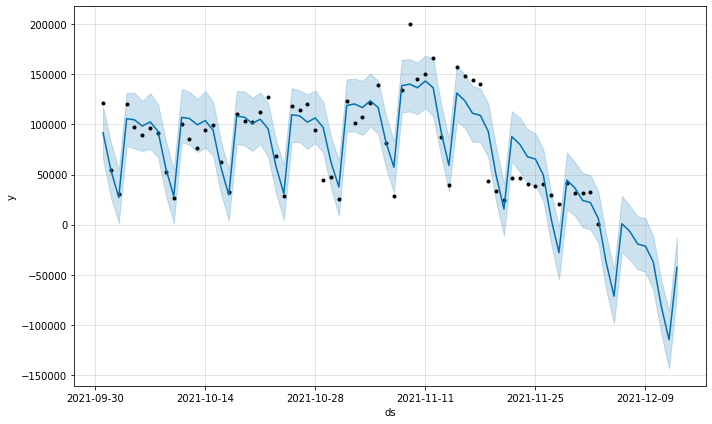

In [55]:
# Future values can be predicted with the following code.
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
fig = model.plot(forecast)

In [56]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-01,82968.817419,65801.711479,117743.219462,82968.817419,82968.817419,8829.723272,8829.723272,8829.723272,8829.723272,8829.723272,8829.723272,0.0,0.0,0.0,91798.540691
1,2021-10-02,83147.045075,27205.241570,81969.237488,83147.045075,83147.045075,-28716.146331,-28716.146331,-28716.146331,-28716.146331,-28716.146331,-28716.146331,0.0,0.0,0.0,54430.898744
2,2021-10-03,83325.272732,1827.895775,54312.677156,83325.272732,83325.272732,-56218.680813,-56218.680813,-56218.680813,-56218.680813,-56218.680813,-56218.680813,0.0,0.0,0.0,27106.591919
3,2021-10-04,83503.500391,78526.270296,131622.507162,83503.500391,83503.500391,22215.516393,22215.516393,22215.516393,22215.516393,22215.516393,22215.516393,0.0,0.0,0.0,105719.016784
4,2021-10-05,83681.728050,76005.878454,131457.225817,83681.728050,83681.728050,20922.287063,20922.287063,20922.287063,20922.287063,20922.287063,20922.287063,0.0,0.0,0.0,104604.015113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2021-12-09,-39923.605157,-47001.496661,6460.852014,-43397.177931,-36150.664039,18483.709643,18483.709643,18483.709643,18483.709643,18483.709643,18483.709643,0.0,0.0,0.0,-21439.895514
70,2021-12-10,-46132.298014,-65605.013780,-11824.843966,-50636.931033,-41100.960494,8829.723272,8829.723272,8829.723272,8829.723272,8829.723272,8829.723272,0.0,0.0,0.0,-37302.574742
71,2021-12-11,-52340.990870,-108373.915150,-54769.853710,-58310.067078,-45897.467887,-28716.146331,-28716.146331,-28716.146331,-28716.146331,-28716.146331,-28716.146331,0.0,0.0,0.0,-81057.137201
72,2021-12-12,-58549.683726,-143486.435654,-86425.258713,-65688.642456,-50639.182931,-56218.680813,-56218.680813,-56218.680813,-56218.680813,-56218.680813,-56218.680813,0.0,0.0,0.0,-114768.364539


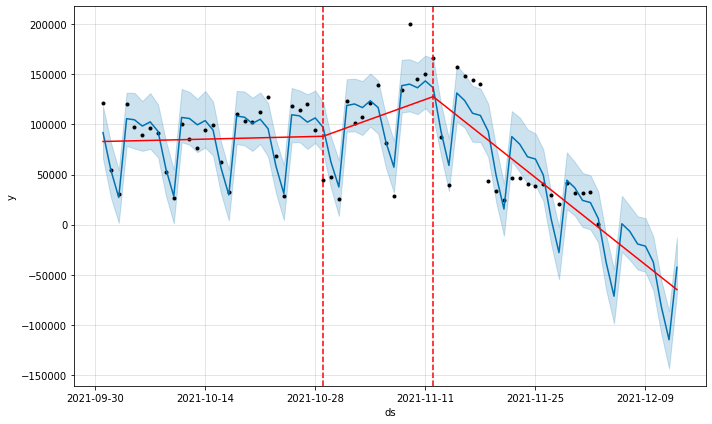

In [57]:
# Plot the predicted trend change points.
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


In [58]:
# Read real GSM network data.
df2 = pd.read_csv("S1_MME_S1_MME_20211228094935.csv")
df2["Time"] = df2["Time"].str.split("\t").str[1]
df2["Time"] = pd.to_datetime(df2["Time"])
df2.columns

Index(['SN', 'Time', 'MME', '\tS1-MME Attach Success Rate(%)',
       '\tS1-MME Attach Delay(ms)', '\tS1-MME EPS Attach Success Rate(%)',
       '\tS1-MME EPS Attach Delay(ms)',
       '\tS1-MME Combined EPS/IMSI Attach Success Rate(%)',
       '\tS1-MME Combined EPS/IMSI Attach Delay(ms)'],
      dtype='object')

In [59]:
# Implementation of trend detection with real network KPI's.
mme = "ANHVUSN03"
kpi = "\tS1-MME Attach Success Rate(%)"
df3 = df2.pivot(index="Time",columns="MME",values=kpi)

<AxesSubplot:xlabel='Time'>

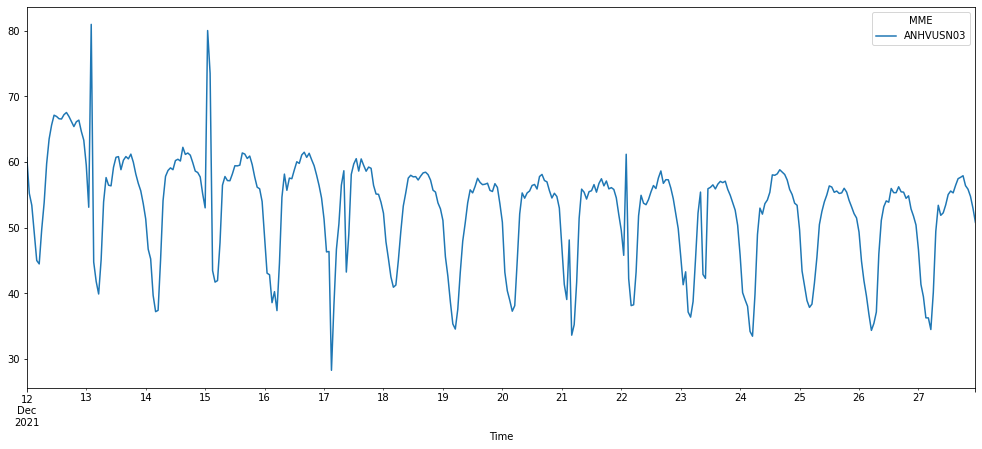

In [60]:
df3[[mme]].plot(figsize=(17,7))


In [61]:
df_anomally = df3[[mme]]
df_anomally = df_anomally.reset_index()

# Change column names.
df_anomally.columns = ["ds","y"]
# define the model
model = Prophet(changepoint_prior_scale=0.5,weekly_seasonality=False,daily_seasonality=True,yearly_seasonality=False)
# fit the model
model.fit(df_anomally)

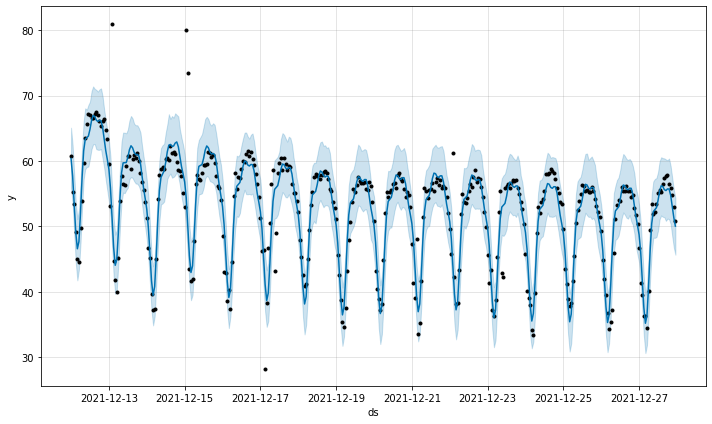

In [62]:
# Extract the upper and lower bond in order to detect anomalies.
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)
fig = model.plot(forecast)

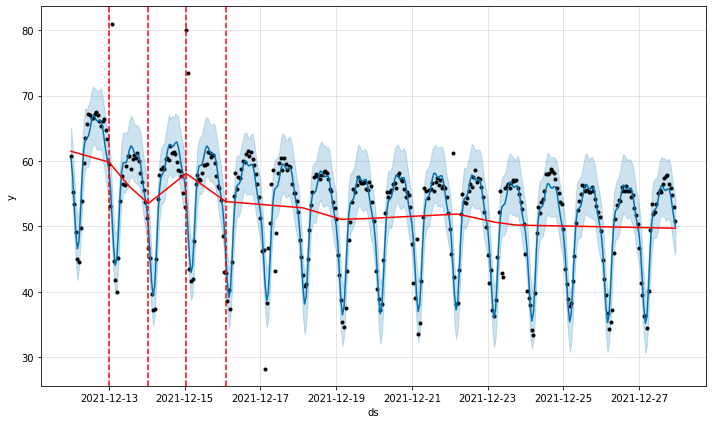

In [63]:
# Detect the pattern changes. 
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast,threshold = 0.7)


<AxesSubplot:xlabel='Time'>

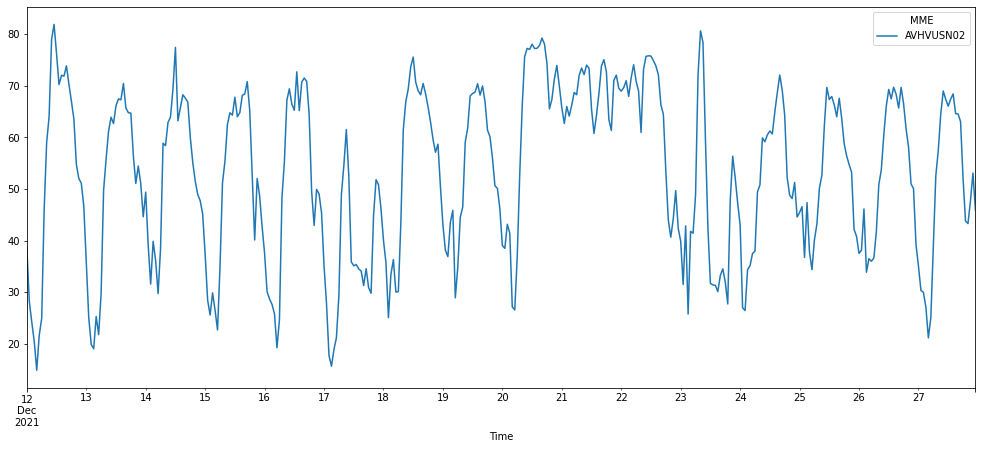

In [64]:
# Implementation of trend detection with real network KPI's.

mme = "AVHVUSN02"
kpi = "\tS1-MME Attach Success Rate(%)"
df3 = df2.pivot(index="Time",columns="MME",values=kpi)
df_anomally = df3[[mme]]
df_anomally = df_anomally.reset_index()

df3[[mme]].plot(figsize=(17,7))

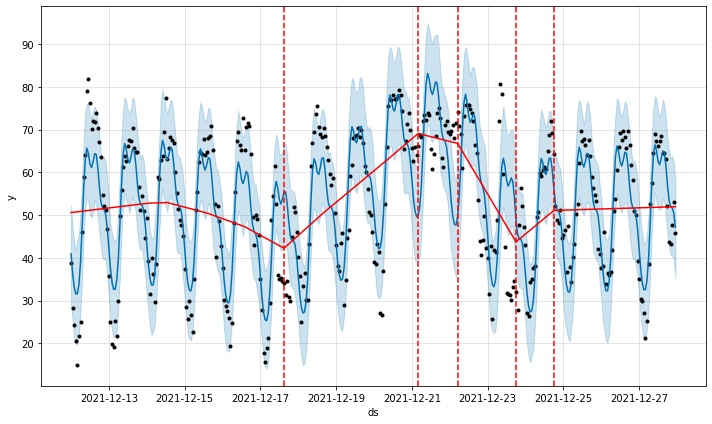

In [65]:
# Cahnge the column names.
df_anomally.columns = ["ds","y"]

# Define the model
model = Prophet(changepoint_prior_scale=0.5,weekly_seasonality=False,daily_seasonality=True,yearly_seasonality=False)

# Fit the model
model.fit(df_anomally)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

#Detect the change points.
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast,threshold = 0.6)


<AxesSubplot:xlabel='Time'>

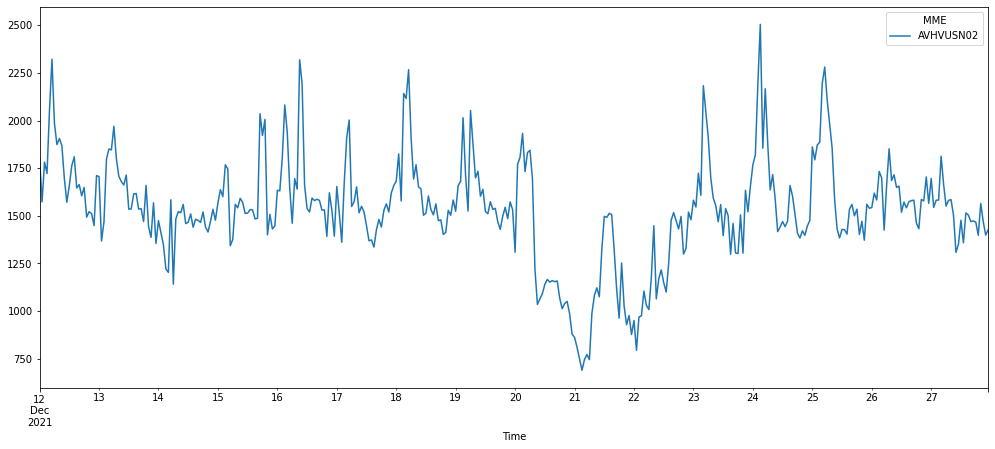

In [66]:
# Implementation of trend detection with real network KPI's.
mme = "AVHVUSN02"
kpi = "\tS1-MME Combined EPS/IMSI Attach Delay(ms)"
df3 = df2.pivot(index="Time",columns="MME",values=kpi)
df_anomally = df3[[mme]]
df_anomally = df_anomally.reset_index()

df3[[mme]].plot(figsize=(17,7))

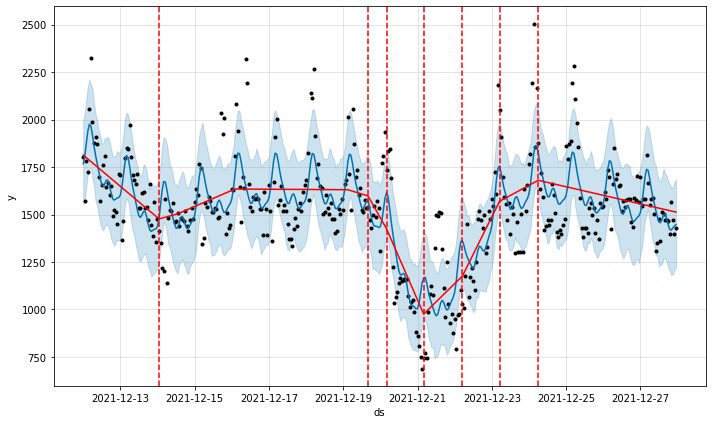

In [67]:
# Detect the trend changes. 
df_anomally.columns = ["ds","y"]

# define the model
model = Prophet(changepoint_prior_scale=0.5,weekly_seasonality=False,daily_seasonality=True,yearly_seasonality=False)

# fit the model
model.fit(df_anomally)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast,threshold = 0.6)


In [68]:
# Change points:
a

[[<matplotlib.lines.Line2D at 0x211718bc0c8>],